Author: Chris J. Dallmann \
Affiliation: University of Wuerzburg \
Last revision: 19-February-2025\
Dyrad Repository:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from sklearn.neighbors import KernelDensity

In [11]:
# Load data
data = pd.read_parquet('R48A07_R20C06_GCaMP7f_tdTomato.parquet', engine='pyarrow')

In [12]:
# Trim dataframe to behavior on the ball
indices_to_keep = np.logical_and.reduce((data['analyze']==1, data['L1_other']==0, data['ball']==1))
data_active = data[indices_to_keep].reset_index(drop=True)

In [13]:
# Add normalized activity 
normalized_activity = data_active.activity.to_numpy()
normalized_activity = normalized_activity-np.min(normalized_activity)
normalized_activity = normalized_activity/np.max(normalized_activity)

data_active["normalized_activity"] = normalized_activity

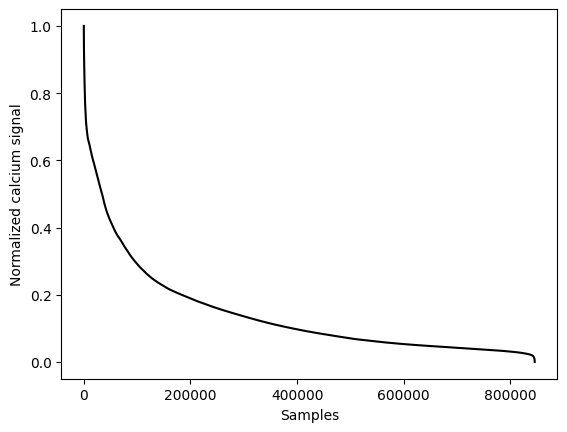

In [14]:
# Plot normalized activity, sorted in descending order
activity = data_active["normalized_activity"].to_numpy()
sort_index = (-activity).argsort()  
activity_sorted = activity[sort_index]

plt.plot(activity_sorted, 'k-')
plt.ylabel('Normalized calcium signal')
plt.xlabel('Samples')
#plt.savefig(r'C:\Users\Chris\Desktop\calcium_signal_sorted.eps', format='eps', transparent=True)
plt.show()

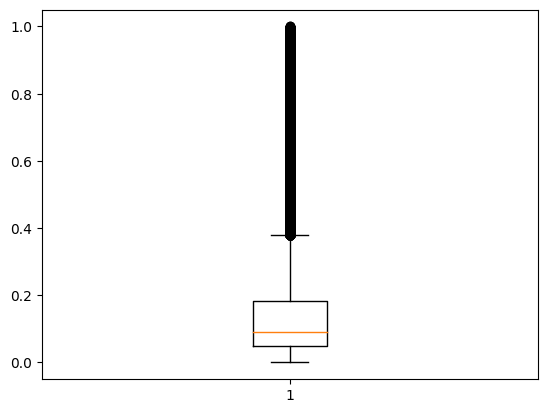

In [30]:
# Plot boxplot of calcium signals
plt.boxplot(activity)
#plt.savefig(r'C:\Users\Chris\Desktop\boxplot_calcium_signal.eps', format='eps', transparent=True)
plt.show()

In [27]:
# Run kernel density estimation
bandwidth = 0.01
X_plot = np.linspace(0,1,1000)[:,np.newaxis]
X = np.array(activity)[:,np.newaxis]
kde = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(X)
kde_score = kde.score_samples(X_plot)

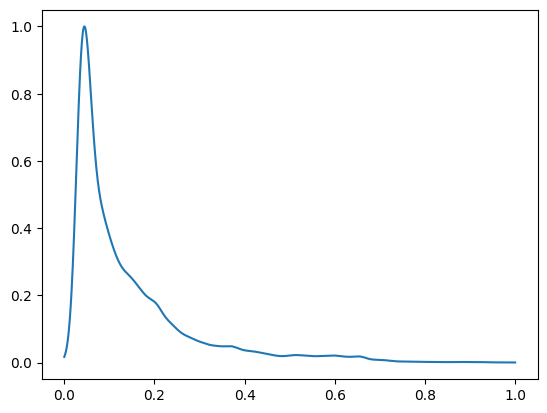

In [28]:
# Plot kernel density estimation
plt.plot(X_plot[:, 0], np.exp(kde_score)/np.max(np.exp(kde_score)))
#plt.savefig(r'C:\Users\Chris\Desktop\kde_calcium_signal.eps', format='eps', transparent=True)
plt.show()

In [15]:
# Trim dataframe to top calcium signals 
calcium_thresh = 0.4
data_active_top = data_active[data_active["normalized_activity"]>=calcium_thresh]

In [41]:
# Get number of data points
df = data_active_top
print('Animals: ' + str(len(df.animal_id.unique().tolist())))
print('Trials: ' + str(len(df.trial.unique().tolist())))
print('Frames: ' + str(len(df)))
print('Minutes: ' + str(len(df)*1/300/60))

N: 6
n: 64
Frames: 55360
Minutes: 3.0755555555555554


In [16]:
# Calculate probability of behaviors for top calcium signals
p_rest_top = len(data_active_top[data_active_top["L1_rest"]==1]) / len(data_active_top)
p_walk_top = len(data_active_top[data_active_top["L1_walk"]==1]) / len(data_active_top)
p_groom_top = len(data_active_top[data_active_top["L1_groom"]==1]) / len(data_active_top)

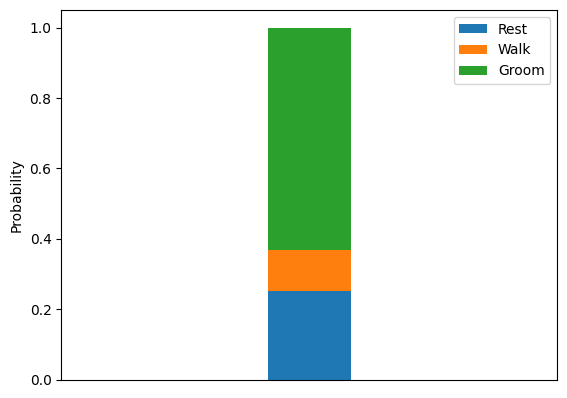

In [17]:
# Plot probability of behaviors for top calcium signals
weight_counts = {
    "Rest": p_rest_top,
    "Walk": p_walk_top,
    "Groom": p_groom_top
}
width = 0.1

fig, ax = plt.subplots()
bottom = 0

for boolean, weight_count in weight_counts.items():
    p = ax.bar(0, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.legend(loc="upper right")
plt.xlim([-.3,.3])
plt.ylabel("Probability")
ax.get_xaxis().set_visible(False)
#plt.savefig(r'C:\Users\Chris\Desktop\behavior.eps', format='eps', transparent=True)
plt.show()

In [18]:
# Get coxa angles across behaviors
dict_angles = {}
dict_angles["L1_rot_top"] = data_active_top.L1A_rot.to_numpy()
dict_angles["L1_rot"] = data_active.L1A_rot.to_numpy()

dict_angles["L1_abduct_top"] = data_active_top.L1A_abduct.to_numpy()
dict_angles["L1_abduct"] = data_active.L1A_abduct.to_numpy()

dict_angles["L1_flex_top"] = data_active_top.L1A_flex.to_numpy()
dict_angles["L1_flex"] = data_active.L1A_flex.to_numpy()

In [19]:
# Run kernel density estimations
bandwidth = 5
X_plot = np.linspace(-50,250,1000)[:,np.newaxis]
dict_kde_angles = {}

for key in dict_angles.keys():
    X = np.array(dict_angles[key])[:,np.newaxis]
    kde = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(X)
    dict_kde_angles[key] = kde.score_samples(X_plot)

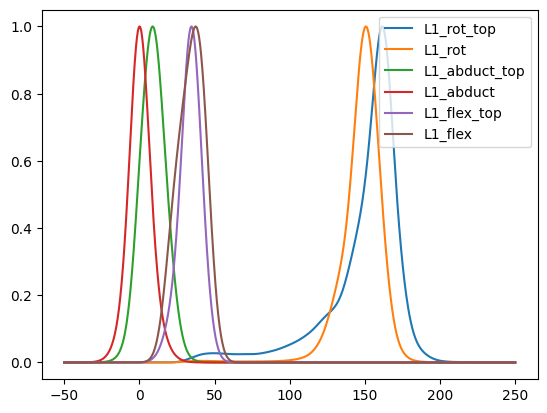

In [20]:
# Plot kernel density estimations
for key in dict_kde_angles.keys():
    plt.plot(X_plot[:, 0], np.exp(dict_kde_angles[key])/np.max(np.exp(dict_kde_angles[key])))

plt.legend(dict_kde_angles.keys(), loc="upper right")
#plt.savefig(r'C:\Users\Chris\Desktop\kde_angles.eps', format='eps', transparent=True)
plt.show()

In [21]:
# Get coxa angles per behavior 
dict_angles_behavior = {}
dict_angles_behavior["L1A_rot_rest"] = data_active.L1A_rot[data_active["L1_rest"]==1].to_numpy()
dict_angles_behavior["L1A_rot_walk"] = data_active.L1A_rot[data_active["L1_walk"]==1].to_numpy()
dict_angles_behavior["L1A_rot_groom"] = data_active.L1A_rot[data_active["L1_groom"]==1].to_numpy()

dict_angles_behavior["L1A_abduct_rest"] = data_active.L1A_abduct[data_active["L1_rest"]==1].to_numpy()
dict_angles_behavior["L1A_abduct_walk"] = data_active.L1A_abduct[data_active["L1_walk"]==1].to_numpy()
dict_angles_behavior["L1A_abduct_groom"] = data_active.L1A_abduct[data_active["L1_groom"]==1].to_numpy()

dict_angles_behavior["L1A_flex_rest"] = data_active.L1A_flex[data_active["L1_rest"]==1].to_numpy()
dict_angles_behavior["L1A_flex_walk"] = data_active.L1A_flex[data_active["L1_walk"]==1].to_numpy()
dict_angles_behavior["L1A_flex_groom"] = data_active.L1A_flex[data_active["L1_groom"]==1].to_numpy()

In [22]:
# Run kernel density estimations
bandwidth = 5
X_plot = np.linspace(-50,250,1000)[:,np.newaxis]
dict_kde_behavior = {}

for key in dict_angles_behavior.keys():
    X = np.array(dict_angles_behavior[key])[:,np.newaxis]
    kde = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(X)
    dict_kde_behavior[key] = kde.score_samples(X_plot)

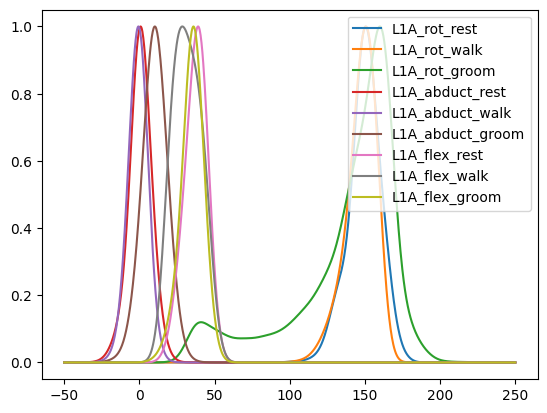

In [23]:
# Plot kernel density estimations
for key in dict_kde_behavior.keys():
    plt.plot(X_plot[:, 0], np.exp(dict_kde_behavior[key])/np.max(np.exp(dict_kde_behavior[key])))

plt.legend(dict_kde_behavior.keys(), loc="upper right")
#plt.savefig(r'C:\Users\Chris\Desktop\kde_behavior.eps', format='eps', transparent=True)
plt.show()